# 模型結果分析
This notebook analyze the magnetization produced by model and plot the result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 30

### 讀檔案

In [44]:
M_t_values = pd.read_csv(f'Erdos Reyni, N=50000, alpha=15, experiment on beta.csv', index_col=0)

'''

for i in [0.8, 0.9, 1, 1.1]:
    df = pd.read_csv(f'M_t_50000_25_{i}.csv', index_col=0)
    M_t_values[f'{i}'] = df['0']
'''
M_t_values

,0.2,0.4,0.6,0.8,1,1.2
0,354,422,158,24,38,146
1,532,892,1200,674,6,852
2,546,1306,2466,1550,-6,2110
3,512,1764,3870,3058,-104,4278
4,428,2664,6254,5852,10,8482
...,...,...,...,...,...,...
2996,-244,6864,9266,10514,10980,11234
2997,-130,7046,9234,10402,10882,11220
2998,-342,7010,9358,10278,10866,11236
2999,-904,6866,9456,10010,10654,10850


array([<Axes: xlabel='t', ylabel='M_t'>, <Axes: xlabel='t', ylabel='M_t'>,
       <Axes: xlabel='t', ylabel='M_t'>, <Axes: xlabel='t', ylabel='M_t'>,
       <Axes: xlabel='t', ylabel='M_t'>, <Axes: xlabel='t', ylabel='M_t'>],
      dtype=object)

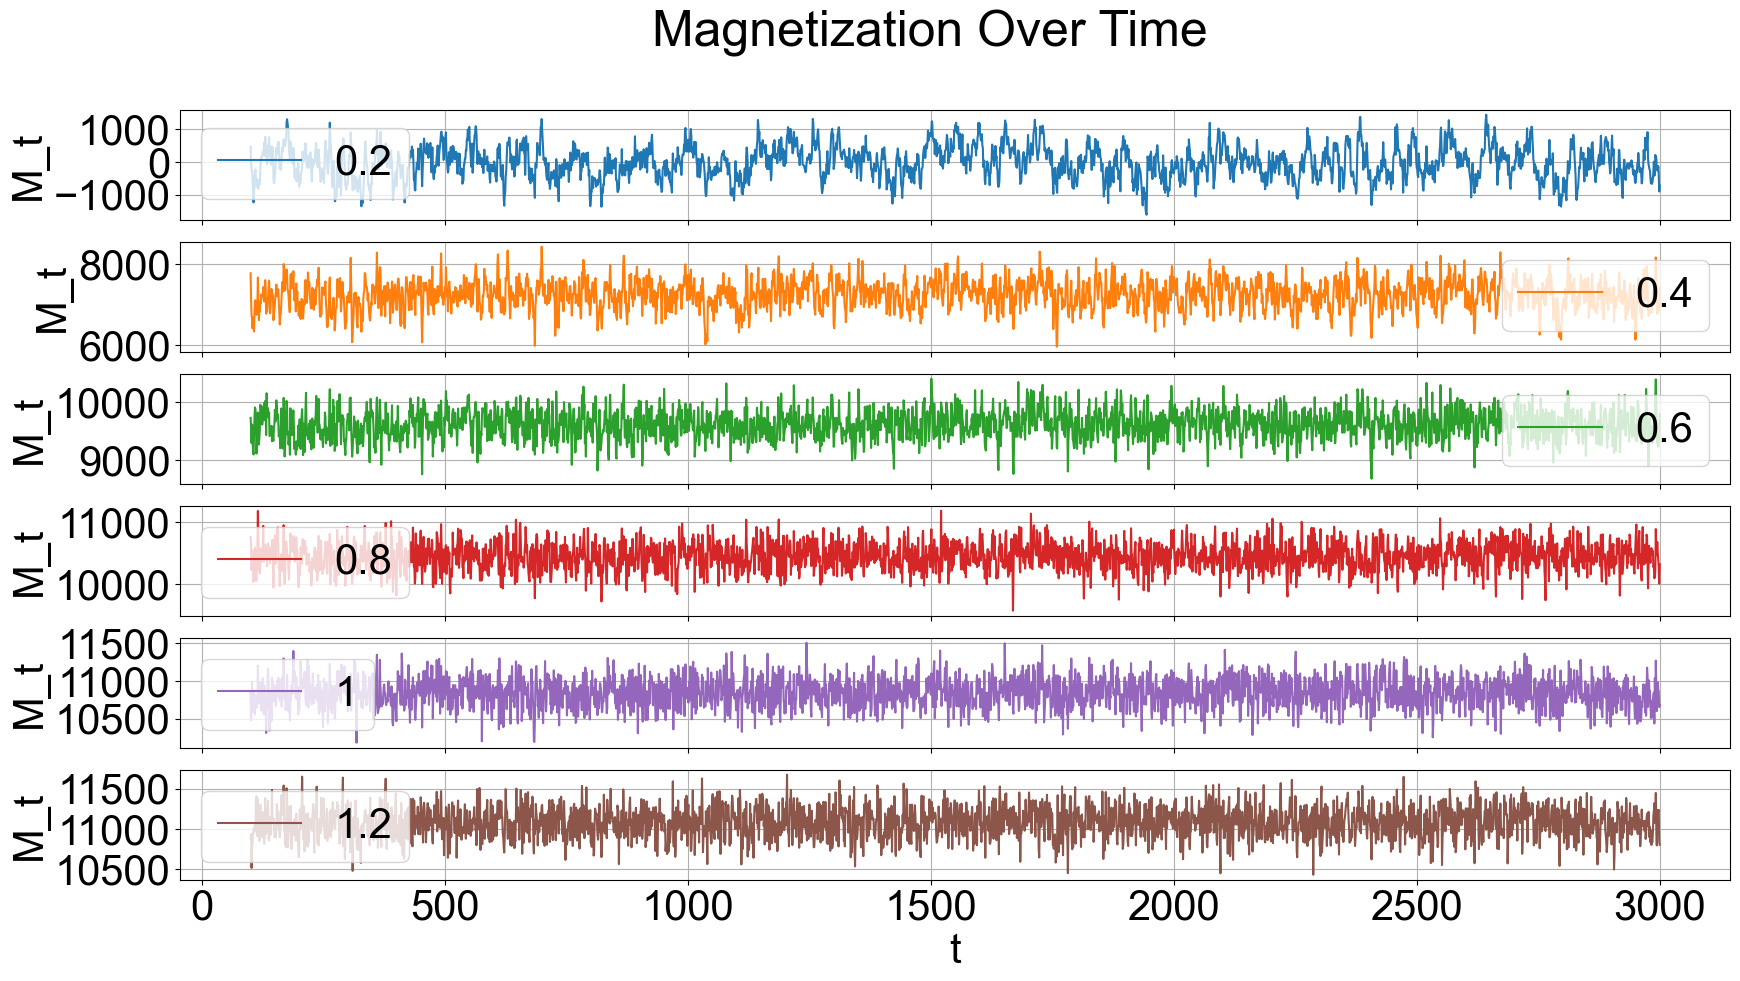

In [45]:
#fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(50,6))

#plt.figure(figsize=(10, 6))
#plt.plot(M_t_values['15'], label='M_t', color='blue', ax=axes[0,0])

M_t_values[100:].plot(subplots=True, figsize=(20, 10), title='Magnetization Over Time', grid=True, xlabel='t', ylabel = 'M_t')

#M_t_values[['0.8','0.9','1.1']].plot(subplots=True, figsize=(20, 10), title='Magnetization Over Time', grid=True, xlabel='t', ylabel = 'M_t')

#plt.xlabel('t')
#plt.ylabel('Magnetization (M_t)')
#plt.legend()
#plt.grid(True)

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


array([<Axes: xlabel='t', ylabel='Returns'>,
       <Axes: xlabel='t', ylabel='Returns'>,
       <Axes: xlabel='t', ylabel='Returns'>,
       <Axes: xlabel='t', ylabel='Returns'>,
       <Axes: xlabel='t', ylabel='Returns'>,
       <Axes: xlabel='t', ylabel='Returns'>], dtype=object)

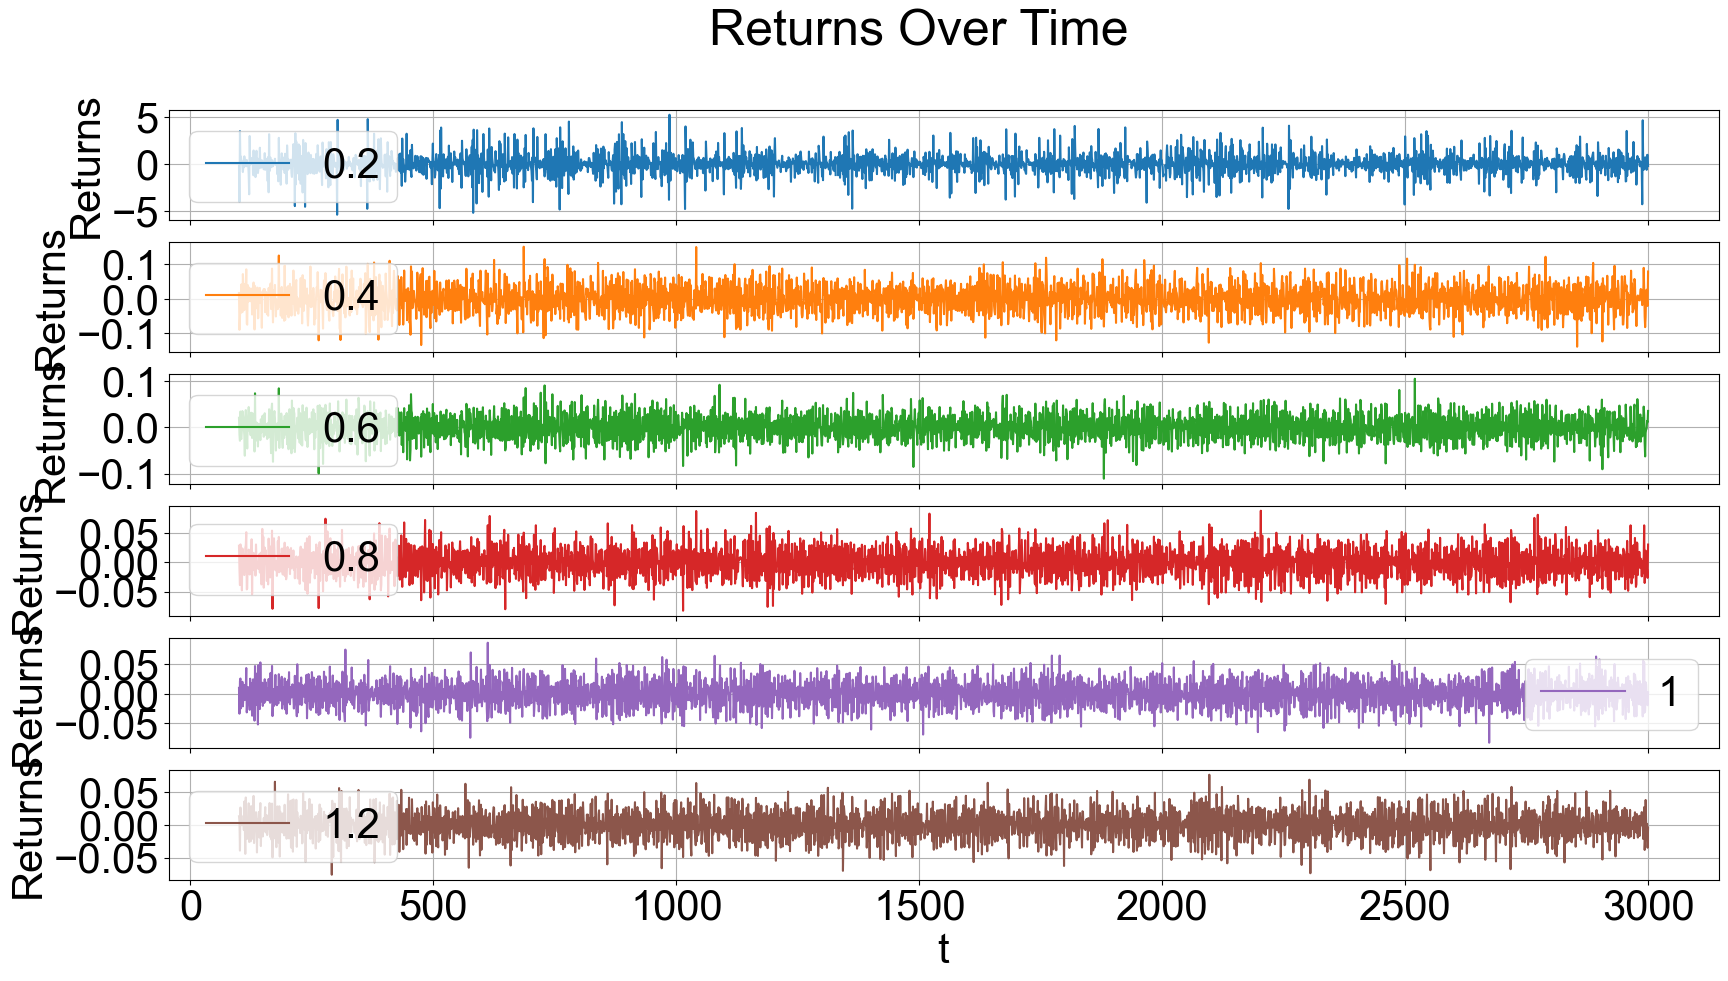

In [46]:
returns = np.log(np.abs(M_t_values)) - np.log(np.abs(M_t_values.shift(1)))
#returns = np.log(M_t_values - M_t_values.shift(1))
#returns = returns.dropna()
returns = returns[100:]
returns.plot(subplots=True, figsize=(20, 10), title='Returns Over Time', grid=True, xlabel='t', ylabel = 'Returns')
#returns[['0.8','0.9','1.1']].plot(subplots=True, figsize=(20, 10), title='Returns Over Time', grid=True, xlabel='t', ylabel = 'Returns', color=['Blue', 'Red', 'Green'])
#plt.figure(figsize=(10, 6))
#plt.plot(returns, label='Returns', color = 'red')
#plt.title('Returns Over Time')
#plt.xlabel('t')
#plt.ylabel('Returns')
#plt.legend()
#plt.grid(True)
#plt.show()
#returns

0.08608527378592123
0.08608527378592123


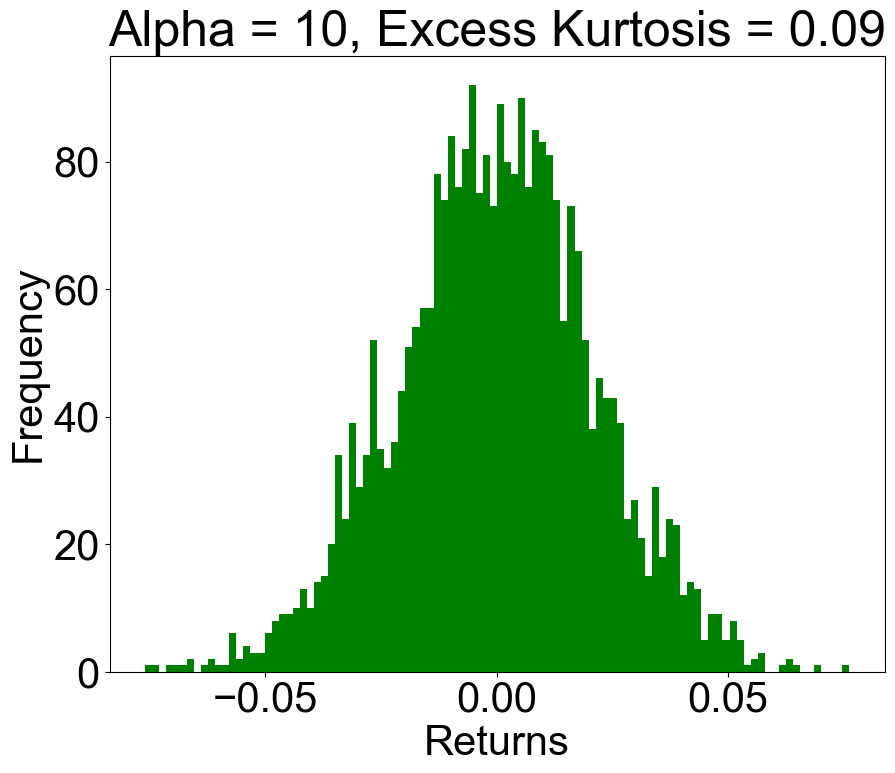

In [52]:
returns_dropna = returns['1.2']
returns_dropna.replace([np.inf, -np.inf], np.nan, inplace=True)
returns_dropna.dropna()
print(returns_dropna.kurtosis())
#excess_kurtosis = stats.kurtosis(returns_dropna)
excess_kurtosis = returns_dropna.kurtosis()
print(excess_kurtosis)
plt.figure(figsize=(10, 8))
#returns[['10','25','30']].dropna().hist(layout=(1, 3))
plt.hist(returns_dropna, bins=100, color = 'green')
plt.title(f'Alpha = 10, Excess Kurtosis = {excess_kurtosis:.2f}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

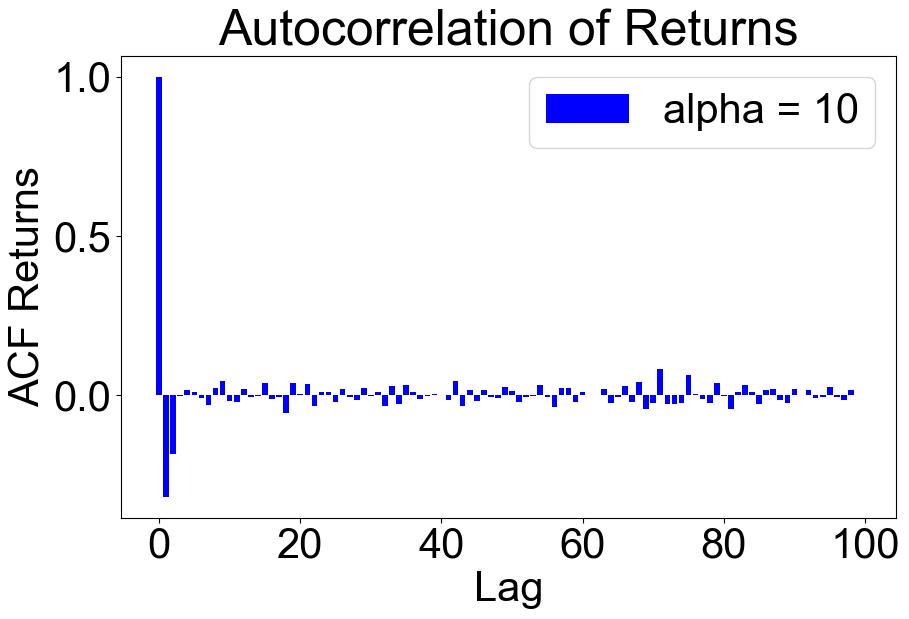

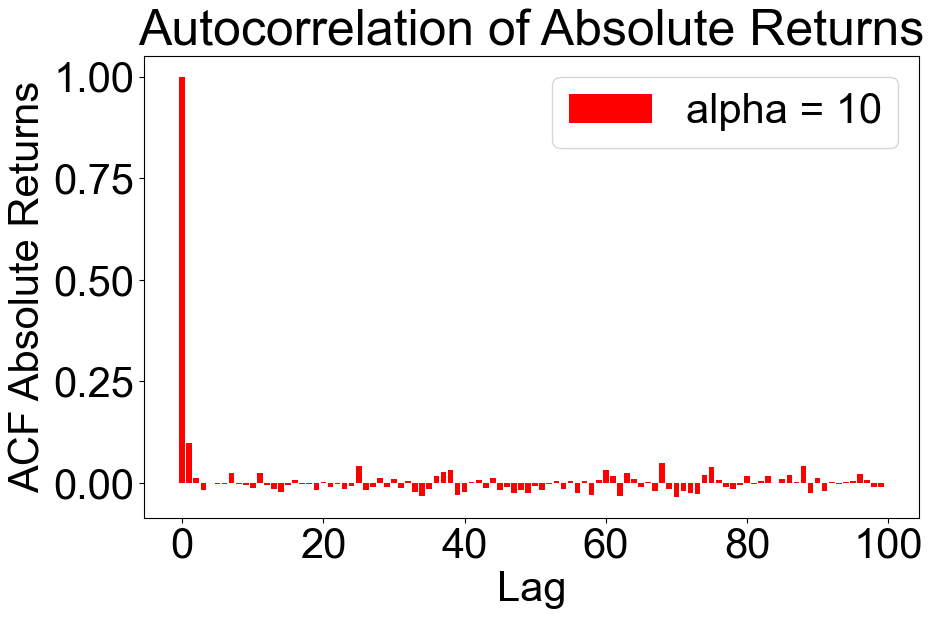

In [58]:
absolute_returns = np.abs(returns['1.2'])

lags = 100
acf_rt = [returns['1.2'].autocorr(lag=i) for i in range(lags)]
acf_abs = [absolute_returns.autocorr(lag=i) for i in range(lags)]

plt.figure(figsize=(10, 6))
plt.bar(range(lags), acf_rt, color='blue')
plt.title('Autocorrelation of Returns')
plt.xlabel('Lag')
plt.ylabel('ACF Returns')
plt.legend(['alpha = 10'])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(lags), acf_abs, color='red')
plt.title('Autocorrelation of Absolute Returns')
plt.xlabel('Lag')
plt.ylabel('ACF Absolute Returns')
plt.legend(['alpha = 10'])
plt.show()

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_7400/1814748550.py:9: RuntimeWarning: divide by zero encountered in log
  filtered_log_cumulative = np.log((1 - cumulative_distribution)[filtered_indices])


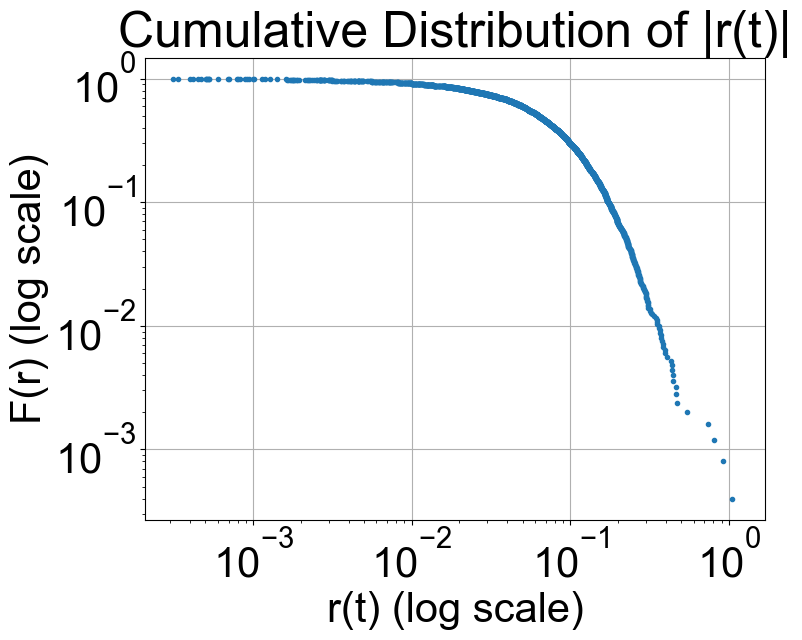

In [21]:
absolute_returns = np.abs(returns['10'])
sorted_abs_returns = np.sort(absolute_returns)
cumulative_distribution = np.arange(1, len(sorted_abs_returns) + 1) / len(sorted_abs_returns)

epsilon = 10e-2  # Small threshold to exclude the tail
filtered_indices = np.where(1 - cumulative_distribution < epsilon)

filtered_log_returns = np.log(sorted_abs_returns[filtered_indices])
filtered_log_cumulative = np.log((1 - cumulative_distribution)[filtered_indices])

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_log_returns[np.logical_and(np.isfinite(filtered_log_returns), np.isfinite(filtered_log_cumulative))], filtered_log_cumulative[np.logical_and(np.isfinite(filtered_log_cumulative), np.isfinite(filtered_log_returns))])

plt.figure(figsize=(8, 6))
plt.loglog(sorted_abs_returns, 1-cumulative_distribution, marker='.', linestyle='none', label='Data')
#plt.loglog(sorted_abs_returns[filtered_indices], np.exp(intercept) * sorted_abs_returns[filtered_indices] ** slope, label=f'Fit: exponent = {-slope:.2f}')
plt.title('Cumulative Distribution of |r(t)|')
plt.xlabel('r(t) (log scale)')
plt.ylabel('F(r) (log scale)')
#plt.legend()
plt.grid(True)
plt.show()


In [22]:
absolute_returns = pd.DataFrame()
sorted_abs_returns = pd.DataFrame()
cumulative_distribution = pd.DataFrame()
for i in ['10', '25', '30']:

    absolute_returns[i] = np.abs(returns[i])
    sorted_abs_returns[i] = np.sort(absolute_returns[i])
    cumulative_distribution[i] = np.arange(1, len(sorted_abs_returns[i]) + 1) / len(sorted_abs_returns[i])

plt.figure(figsize=(8, 6))
plt.loglog(sorted_abs_returns, 1-cumulative_distribution, marker='.', linestyle='none')
#plt.loglog(sorted_abs_returns[filtered_indices], np.exp(intercept) * sorted_abs_returns[filtered_indices] ** slope, label=f'Fit: exponent = {-slope:.2f}')
plt.title('Cumulative Distribution of |r(t)|')
plt.xlabel('r(t) (log scale)')
plt.ylabel('F(r) (log scale)')
plt.legend(['alpha = 10', 'alpha = 25', 'alpha = 30'])
plt.grid(True)
plt.show()

KeyError: '25'

In [23]:
from arch import arch_model

am = arch_model(returns.dropna(), vol='ARCH', p=10)
res = am.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 185392676.20426357
Iteration:      2,   Func. Count:     37,   Neg. LLF: 17959029901.32589
Iteration:      3,   Func. Count:     60,   Neg. LLF: 8879.498238156575
Iteration:      4,   Func. Count:     73,   Neg. LLF: 5883.050947762327
Iteration:      5,   Func. Count:     86,   Neg. LLF: 18813.40253146803
Iteration:      6,   Func. Count:    102,   Neg. LLF: 2727.6240962321845
Iteration:      7,   Func. Count:    115,   Neg. LLF: 2277.929355965686
Iteration:      8,   Func. Count:    129,   Neg. LLF: 2614.8334156851906
Iteration:      9,   Func. Count:    145,   Neg. LLF: 14203.334770193202
Iteration:     10,   Func. Count:    159,   Neg. LLF: 13889.723502822653
Iteration:     11,   Func. Count:    177,   Neg. LLF: 8032.146414064946
Iteration:     12,   Func. Count:    194,   Neg. LLF: 6373.866815014209
Iteration:     13,   Func. Count:    210,   Neg. LLF: 10272094.083065148
Iteration:     14,   Func. Count:    230,   Neg. LLF: 1530

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [31]:
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1533.91
Distribution:                  Normal   AIC:                          -3043.82
Method:            Maximum Likelihood   BIC:                          -2971.74
                                        No. Observations:                 3001
Date:                Wed, Apr 24 2024   Df Residuals:                     3000
Time:                        12:31:24   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.2804e-04  1.734e-03     -0.132      0.